# Trade Insights: Top Countries in U.S. Exports, Imports, and Tariffs

This Python script downloads a dataset on U.S. tariffs for 2025, cleans the data, and generates visualizations for key trade metrics.

1.   Imports Libraries: Uses kagglehub, pandas, matplotlib, and seaborn for data handling and visualization.
2.   Downloads Dataset: Retrieves the dataset from Kaggle and loads it into a DataFrame.
3.   Cleans Data: Strips whitespace from column names, removes commas and percentage signs, and converts relevant columns to numeric types.
4.   Generates Visualizations: Creates bar plots for:
*   Top 10 U.S. exports by country.
*   Top 10 U.S. imports by country.
*   Top 10 countries by alleged tariffs.


5.   Handles Deprecation Warnings: Adjusts plot parameters to avoid warnings from the Seaborn library.



This script provides insights into U.S. trade relationships and the impact of tariffs.

Dataset downloaded to: /kaggle/input/us-tariffs-2025
Loaded 204 rows
Sample data:
          Country US 2024 Deficit US 2024 Exports  \
0           China      -295,401.6       143,545.7   
1  European Union      -235,571.2       370,189.2   
2        Mexico**      -171,809.2       334,041.4   
3         Vietnam      -123,463.0        13,098.2   
4          Taiwan       -73,927.2        42,336.9   

  US 2024 Imports (Customs Basis) Trump Tariffs Alleged Trump Response  
0                       438,947.4                   67%            34%  
1                       605,760.4                   39%            19%  
2                       505,850.6                   34%            17%  
3                       136,561.2                   90%            45%  
4                       116,264.0                   64%            32%  


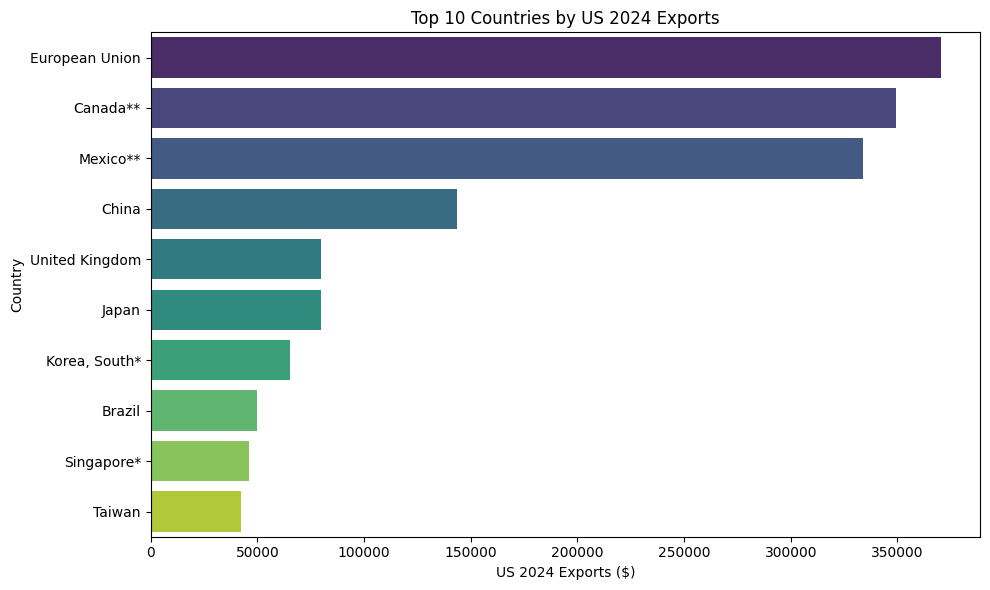

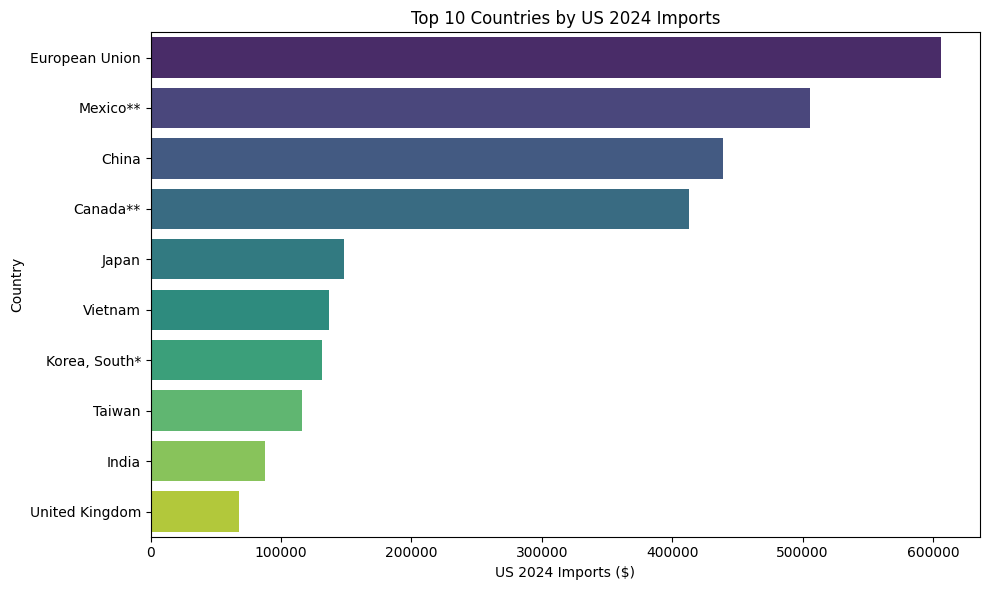

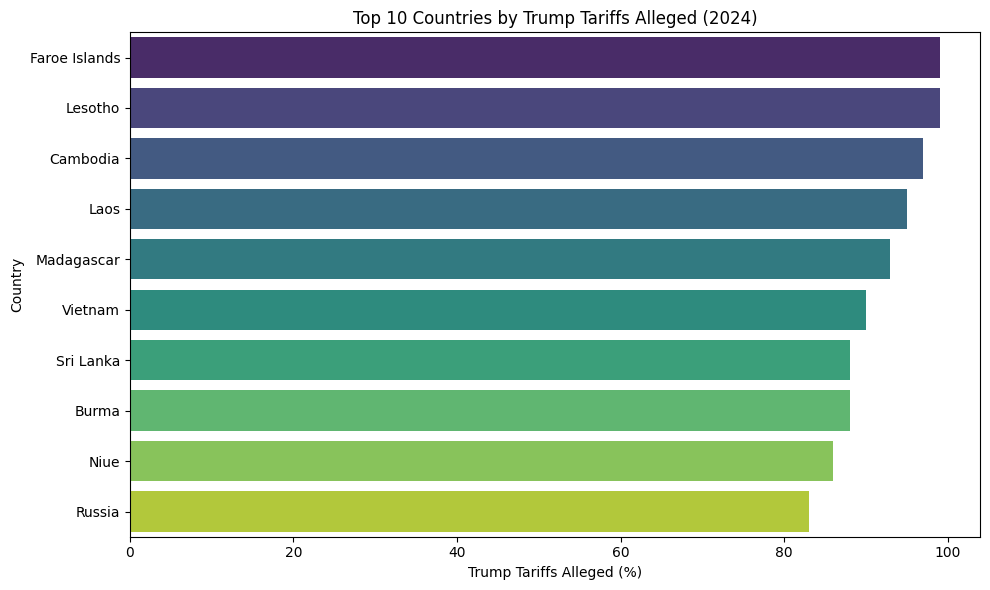

In [24]:
import kagglehub
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Download dataset
path = kagglehub.dataset_download("danielcalvoglez/us-tariffs-2025")
print("Dataset downloaded to:", path)

# 2. Find and load the CSV file
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
if not csv_files:
    raise FileNotFoundError("No CSV file found in the dataset")

# Try reading with different encodings and error handling
try:
    df = pd.read_csv(os.path.join(path, csv_files[0]),
                     encoding='utf-8',
                     delimiter=';',  # Specify the delimiter
                     on_bad_lines='skip')  # Will skip problematic rows
except UnicodeDecodeError:
    df = pd.read_csv(os.path.join(path, csv_files[0]),
                     encoding='latin1',
                     delimiter=';',  # Specify the delimiter
                     on_bad_lines='skip')

print(f"Loaded {len(df)} rows")
print("Sample data:")
print(df.head())

# 3. Clean data - handle missing values and check columns
df.columns = df.columns.str.strip()

# Clean and convert relevant columns to numeric
df['Trump Tariffs Alleged'] = df['Trump Tariffs Alleged'].astype(str).str.replace('%', '', regex=False).str.replace(' ', '', regex=False)
df['Trump Tariffs Alleged'] = pd.to_numeric(df['Trump Tariffs Alleged'], errors='coerce')

df['US 2024 Exports'] = df['US 2024 Exports'].astype(str).str.replace(',', '', regex=False)  # Remove commas if present
df['US 2024 Exports'] = pd.to_numeric(df['US 2024 Exports'], errors='coerce')

df['US 2024 Imports (Customs Basis)'] = df['US 2024 Imports (Customs Basis)'].astype(str).str.replace(',', '', regex=False)  # Remove commas if present
df['US 2024 Imports (Customs Basis)'] = pd.to_numeric(df['US 2024 Imports (Customs Basis)'], errors='coerce')

# 4. Create visualizations for the top 10 countries

# 4.1 Top 10 US 2024 Exports by Country
top_exports = df.nlargest(10, 'US 2024 Exports')

plt.figure(figsize=(10, 6))
sns.barplot(x='US 2024 Exports', y='Country', data=top_exports, hue='Country', palette='viridis', legend=False)
plt.title('Top 10 Countries by US 2024 Exports')
plt.xlabel('US 2024 Exports ($)')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig("top_10_us_2024_exports.png", dpi=300)
plt.show()

# 4.2 Top 10 US 2024 Imports by Country
top_imports = df.nlargest(10, 'US 2024 Imports (Customs Basis)')

plt.figure(figsize=(10, 6))
sns.barplot(x='US 2024 Imports (Customs Basis)', y='Country', data=top_imports, hue='Country', palette='viridis', legend=False)
plt.title('Top 10 Countries by US 2024 Imports')
plt.xlabel('US 2024 Imports ($)')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig("top_10_us_2024_imports.png", dpi=300)
plt.show()

# 4.3 Top 10 Countries by Trump Tariffs Alleged
top_tariffs = df.nlargest(10, 'Trump Tariffs Alleged')

plt.figure(figsize=(10, 6))
sns.barplot(x='Trump Tariffs Alleged', y='Country', data=top_tariffs, hue='Country', palette='viridis', legend=False)
plt.title('Top 10 Countries by Trump Tariffs Alleged (2024)')
plt.xlabel('Trump Tariffs Alleged (%)')
plt.ylabel('Country')
plt.tight_layout()
plt.savefig("top_10_countries_tariffs.png", dpi=300)
plt.show()